In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/New folder/iris.csv")
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
x = df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# performing elbow methods to find the optimum no of clusters

In [38]:
from sklearn.cluster import KMeans
wcss=[] #Within-Cluster Sum of Squares

In [44]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)# k-means++ is an algo is a smart way to initialize centroids with improved quality
    kmeans.fit(x)# kmeans++ is also used in case of a large dataset, and for consistent results
    wcss.append(kmeans.inertia_)# kmeans.inertia_ is a formula used to segregate the data points in the datasets into clusters

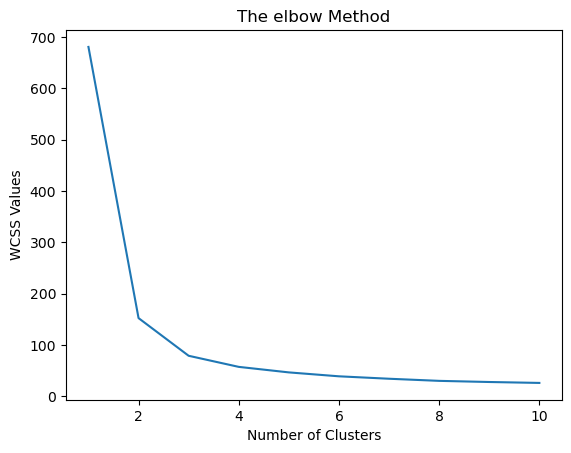

In [40]:
plt.plot(range(1,11),wcss)
plt.title("The elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")
plt.show()

elbow method is used when we are not aware of the number of optimal clusters

In [41]:
# in the above graph we have got the optimal number of clusters at 3
kmeansmodel=KMeans(n_clusters=3,init='k-means++',random_state=0)  of clusters
y_means=kmeansmodel.fit_predict(x)

In [11]:
y_kmeans = kmeansmodel.fit_predict(x)

Training a Model using Unsupervised Learning Algorothm(KMeans)

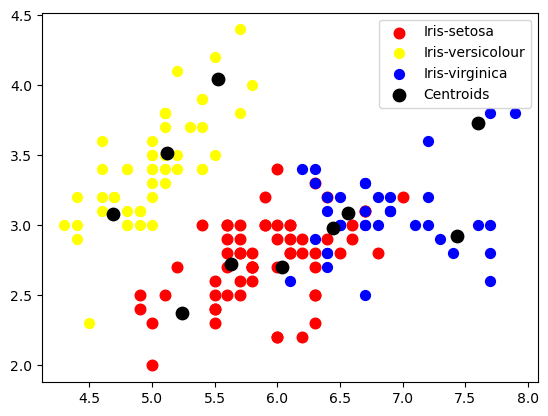

In [12]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=58,c='red', label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=50,c='yellow', label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s=50,c='blue', label="Iris-virginica")

#Plotting Centroids to make it more informative

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80,c='black', label='Centroids')

plt.legend()

plt.show()

The scatter plot shows distinct clusters represented by different colors: red for the cluster labeled "Iris-setosa," yellow for "Iris-versicolour," and blue for "Iris-virginica."

The points within each cluster (color) are grouped closely together, indicating that the algorithm has successfully separated the data into meaningful clusters based on the features.

The black points represent the centroids of each cluster. These centroids are the calculated mean positions of the data points within each cluster.

The algorithm has assigned each data point to one of the three clusters (Iris-setosa, Iris-versicolour, Iris-virginica), and the scatter plot illustrates these assignments.

### Spliting the data set into training and testing data set

In [13]:
#Spliting the dataset in independent and dependent variables
X = df.iloc[:,:4].values
y = df['species'].values

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [15]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [17]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [18]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


In [20]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))  

Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


In [13]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [14]:
x=df['sepal_length']
y=df['petal_length']

In [15]:
x

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [16]:
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

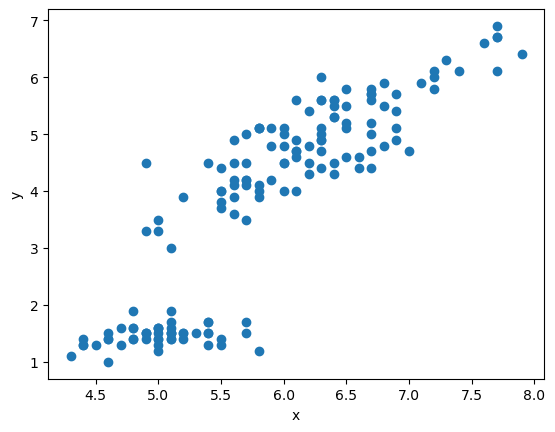

In [17]:
fig, ax = plt.subplots()

ax.scatter(x,y)

ax.set_xlabel('x',fontsize = 10)
ax.set_ylabel('y',fontsize = 10)

plt.show()

In [18]:
np.corrcoef(x,y)

array([[1.        , 0.87175416],
       [0.87175416, 1.        ]])

In [19]:
x=df['sepal_width']
y=df['sepal_length']

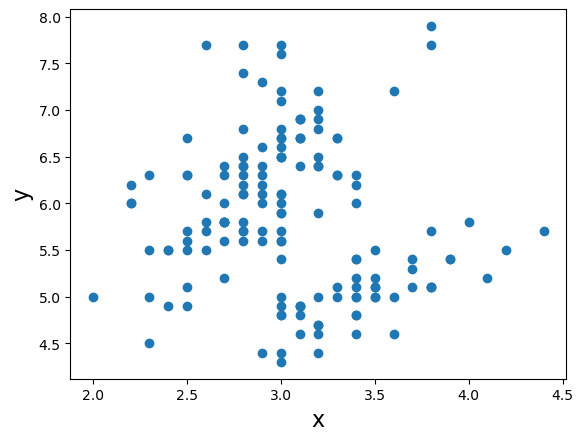

In [20]:
fig, ax = plt.subplots()

ax.scatter(x,y)

ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)

plt.show()

In [21]:
np.corrcoef(x,y)

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

In [22]:
x=df['petal_width']
y=df['sepal_length']

In [23]:
x

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [24]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

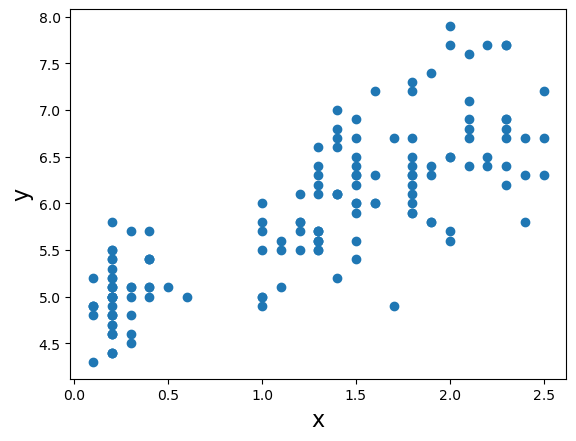

In [25]:
fig, ax = plt.subplots()

ax.scatter(x,y)

ax.set_xlabel('x',fontsize = 16)
ax.set_ylabel('y',fontsize = 16)

plt.show()

In [26]:
np.corrcoef(x,y)

array([[1.        , 0.81795363],
       [0.81795363, 1.        ]])

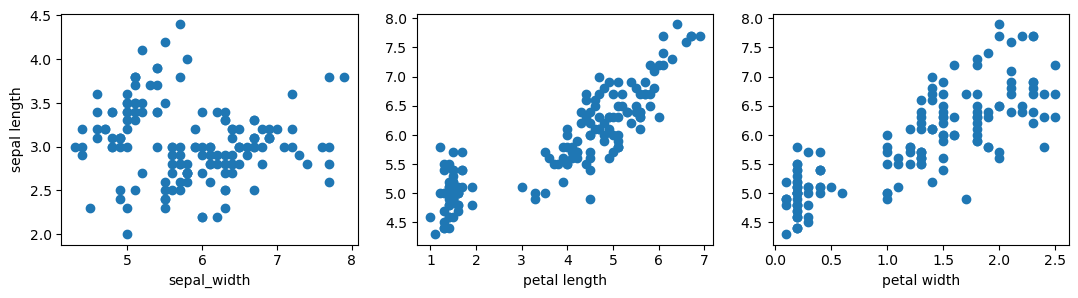

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (13,3))

# scatter plot for sepal_width
ax[0].scatter(df['sepal_length'],df['sepal_width'])
ax[0].set_xlabel('sepal_width')
ax[0].set_ylabel('sepal length')

#scatter plot for petal length
ax[1].scatter(df['petal_length'],df['sepal_length'])
ax[1].set_xlabel('petal length')

#scatter plot for petal width
ax[2].scatter(df['petal_width'],df['sepal_length'])
ax[2].set_xlabel('petal width')

plt.show()


In [28]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

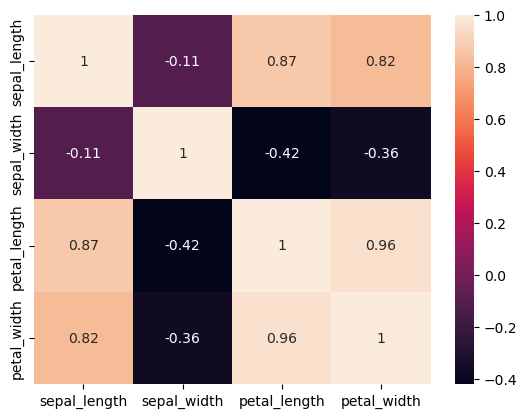

In [29]:
sns.heatmap(df.corr().round(2),annot=True)

# Pearsons Correlation

In [23]:
import scipy.stats

x=df['sepal_width']
y=df['sepal_length']

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: -0.10936924995064937
P-value: 0.1827652152713699


In [24]:
import scipy.stats

x=df['petal_length']
y=df['sepal_length']

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.8717541573048713
P-value: 1.0384540627941062e-47


In [25]:
import scipy.stats

x=df['petal_width']
y=df['sepal_length']

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.8179536333691635
P-value: 2.3148491512728037e-37


In [26]:
import scipy.stats

x=df['sepal_width']
y=df['petal_length']

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: -0.4205160964011545
P-value: 8.429366392950231e-08


# spearman rank correlation

In [27]:
import scipy.stats

x=df['sepal_width']
y=df['sepal_length']

# Calculate Spearman rank correlation coefficient
corr_coefficient, p_value = scipy.stats.spearmanr(x, y)

print("Spearman Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Spearman Rank Correlation Coefficient: -0.15945651848582867
P-value: 0.05128491483834292


In [28]:
import scipy.stats

x=df['petal_length']
y=df['sepal_length']

# Calculate Spearman rank correlation coefficient
corr_coefficient, p_value = scipy.stats.spearmanr(x, y)

print("Spearman Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Spearman Rank Correlation Coefficient: 0.8813863932886515
P-value: 4.64951031453217e-50


In [29]:
import scipy.stats

x=df['petal_width']
y=df['sepal_length']

# Calculate Spearman rank correlation coefficient
corr_coefficient, p_value = scipy.stats.spearmanr(x, y)

print("Spearman Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Spearman Rank Correlation Coefficient: 0.8344206519767947
P-value: 3.9702124571318824e-40


In [30]:
import scipy.stats

x=df['sepal_width']
y=df['petal_length']

# Calculate Spearman rank correlation coefficient
corr_coefficient, p_value = scipy.stats.spearmanr(x, y)

print("Spearman Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Spearman Rank Correlation Coefficient: -0.3034206463815157
P-value: 0.0001603809454660342


# Kendalltau correlation

In [31]:
import scipy.stats
x=df['sepal_width']
y=df['sepal_length']

# Calculate Kendall Tau rank correlation coefficient
corr_coefficient, p_value = scipy.stats.kendalltau(x, y)

print("Kendall Tau Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Kendall Tau Rank Correlation Coefficient: -0.07211191983943098
P-value: 0.2124302269046261


In [32]:
import scipy.stats
x=df['petal_length']
y=df['sepal_length']

# Calculate Kendall Tau rank correlation coefficient
corr_coefficient, p_value = scipy.stats.kendalltau(x, y)

print("Kendall Tau Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


Kendall Tau Rank Correlation Coefficient: 0.7176237822459846
P-value: 1.435422169041153e-36


In [33]:
import scipy.stats
x=df['petal_width']
y=df['sepal_length']

# Calculate Kendall Tau rank correlation coefficient
corr_coefficient, p_value = scipy.stats.kendalltau(x, y)

print("Kendall Tau Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Kendall Tau Rank Correlation Coefficient: 0.6549601351485415
P-value: 8.554632616781567e-30


In [34]:
import scipy.stats
x=df['sepal_width']
y=df['petal_length']

# Calculate Kendall Tau rank correlation coefficient
corr_coefficient, p_value = scipy.stats.kendalltau(x, y)

print("Kendall Tau Rank Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

Kendall Tau Rank Correlation Coefficient: -0.1823910695357523
P-value: 0.0015985490904955651


# Testing of Hypothesis for two variables

In [35]:
import scipy.stats

x=df['petal_length']
y=df['sepal_length']

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

alpha = 0.05
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")


Pearson Correlation Coefficient: 0.8717541573048713
P-value: 1.0384540627941062e-47
Reject the null hypothesis: There is a significant correlation.


In [36]:
import scipy.stats

x=df['sepal_width']
y=df['sepal_length']

# Calculate Pearson correlation coefficient
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)


alpha = 0.05
corr_coefficient, p_value = scipy.stats.pearsonr(x, y)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation.")


Pearson Correlation Coefficient: -0.10936924995064937
P-value: 0.1827652152713699
Fail to reject the null hypothesis: There is no significant correlation.


# Correlation Coefficients and its interpretation

# Correlation levels refer to the strength and direction of the linear relationship between two variables. Correlation coefficients, such as the Pearson correlation coefficient, quantify these relationships and provide a numerical measure of correlation. The correlation coefficient can range from -1 to 1, indicating different levels and directions of correlation:


Perfect Positive Correlation (1.0): When the correlation coefficient is equal to 1, it represents a perfect positive correlation. This means that as one variable increases, the other variable also increases in a linear fashion. The relationship is perfectly positive, and the data points align perfectly on a straight line with a positive slope.

Strong Positive Correlation: A correlation coefficient between 0.7 and 1.0 indicates a strong positive correlation. In this case, there is a strong tendency for both variables to increase together, but the relationship may not be perfectly linear.

Moderate Positive Correlation: A correlation coefficient between 0.3 and 0.7 suggests a moderate positive correlation. This means that there is a moderate tendency for the variables to increase together in a roughly linear fashion.

Weak Positive Correlation: When the correlation coefficient is between 0 and 0.3, it represents a weak positive correlation. In this case, there is a weak tendency for the variables to increase together, and the linear relationship is not very strong.

No Correlation (0.0): A correlation coefficient of 0 indicates no linear correlation between the two variables. This means that there is no consistent linear pattern in their relationship. It doesn't mean there is no relationship at all; it just means there is no linear relationship.

Weak Negative Correlation: A correlation coefficient between -0.3 and 0 suggests a weak negative correlation. This means that there is a weak tendency for one variable to increase as the other decreases in a roughly linear fashion.

Moderate Negative Correlation: A correlation coefficient between -0.7 and -0.3 represents a moderate negative correlation. In this case, there is a moderate tendency for one variable to increase as the other decreases in a roughly linear fashion.

Strong Negative Correlation: A correlation coefficient between -1.0 and -0.7 indicates a strong negative correlation. This means that as one variable increases, the other variable decreases in a strong linear fashion.

Perfect Negative Correlation (-1.0): When the correlation coefficient is equal to -1, it represents a perfect negative correlation. This means that as one variable increases, the other variable decreases in a perfectly linear fashion, and the data points align perfectly on a straight line with a negative slope.

correlation measures only linear relationships between variables. It may not capture more complex or nonlinear associations between variables, which might require different analytical techniques. Additionally, correlation does not imply causation; a strong correlation does not necessarily mean that one variable causes the other.